<a href="https://colab.research.google.com/github/IT21174230/ML-Journey/blob/main/MLOM_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREATING A CONVOLUTIONAL NEURAL NETWORK**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path='/content/drive/MyDrive/Cat&Dog Dataset/Training_data'
valid_path='/content/drive/MyDrive/Cat&Dog Dataset/Testing_data'

In [4]:
model=tf.keras.models. Sequential([

# Note the input shape is the desired size of the image 300x300 with 3 bytes color

# This is the first convolution

  tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(300, 300, 3)),

  tf.keras.layers.MaxPooling2D(2, 2),
  # downsample to a 2x2 matrix
# The second convolution

  tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),

  tf.keras.layers.MaxPooling2D(pool_size=2),

# The third convolution

  tf.keras.layers.Conv2D (filters=32, kernel_size=3, activation='relu'),

  tf.keras.layers.MaxPooling2D(pool_size=2),

# The fourth convolution

  tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),

  tf.keras.layers.MaxPooling2D(pool_size=2),

# The fifth convolution

  tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),

tf.keras.layers.MaxPooling2D(pool_size=2),

# Flatten the results to feed into a DNN

tf.keras.layers. Flatten(),

# 512 neuron hidden layer

tf.keras.layers.Dense (512, activation='relu'),

tf.keras.layers.Dropout(0.5),

# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Cat') and 1 for the other ("Dog")

tf.keras.layers.Dense (1, activation='sigmoid')

])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0

In [7]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
loss='binary_crossentropy',
metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All train images will be rescaled by 1./255
train_datagen=ImageDataGenerator (rescale=1./255)

#Flow training images in batches of 128 using train datagen generator

train_generator=train_datagen.flow_from_directory(train_path, #This is the source directory for training images
                                                  target_size=(300, 300), # All images will be resized to 158x158
                                                  batch_size=32,
# Since we use binary_crossentropy loss, we need binary labels
                                                  class_mode='binary')

# All test images will be rescaled by 1./255

test_datagen=ImageDataGenerator(rescale=1/255)
#apply predefined specification to test dataset
test_set=test_datagen.flow_from_directory(valid_path, target_size=(300, 300),batch_size = 32,class_mode='binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
history=model.fit(train_generator,
          steps_per_epoch=20,
          epochs=30,
          validation_data=test_set,
          validation_steps=7
          )

Epoch 1/30
20/20 [==============================] - 109s 5s/step - loss: 0.6578 - accuracy: 0.6035 - val_loss: 0.7363 - val_accuracy: 0.5000
Epoch 2/30
20/20 [==============================] - 28s 1s/step - loss: 0.6626 - accuracy: 0.6035 - val_loss: 0.7054 - val_accuracy: 0.5000
Epoch 3/30
20/20 [==============================] - 28s 1s/step - loss: 0.6499 - accuracy: 0.6066 - val_loss: 0.6694 - val_accuracy: 0.5450
Epoch 4/30
20/20 [==============================] - 28s 1s/step - loss: 0.6234 - accuracy: 0.6398 - val_loss: 0.6600 - val_accuracy: 0.5650
Epoch 5/30
20/20 [==============================] - 28s 1s/step - loss: 0.6181 - accuracy: 0.6603 - val_loss: 0.6649 - val_accuracy: 0.5800
Epoch 6/30
20/20 [==============================] - 28s 1s/step - loss: 0.6229 - accuracy: 0.6603 - val_loss: 0.8101 - val_accuracy: 0.5100
Epoch 7/30
20/20 [==============================] - 28s 1s/step - loss: 0.6264 - accuracy: 0.6651 - val_loss: 0.6537 - val_accuracy: 0.6300
Epoch 8/30
20/20 [=

In [10]:
model.save_weights('first_30.h5')

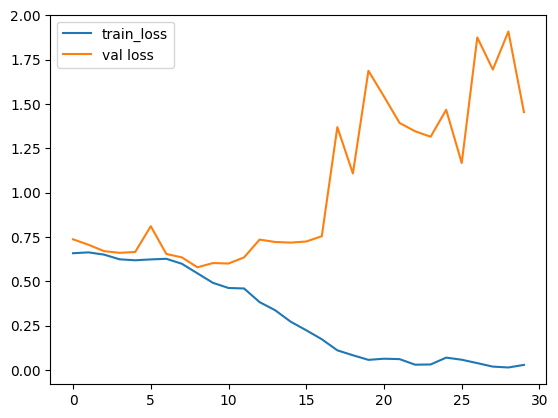

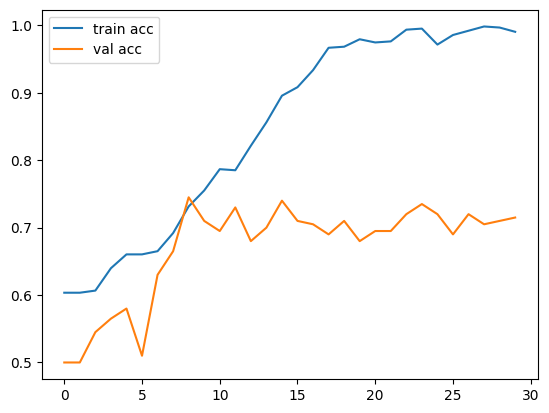

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# model is overfitted even with the dropout layer